In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family']='simhei'
mpl.rcParams['axes.unicode_minus']=False # 处理负号问题 
mpl.rcParams['font.size'] = 20.0

In [2]:
data=pd.read_csv('./gd1.csv')

In [3]:
data_spf=data[data["type"]=="商品房"]
data_spf.head(1)

,Unnamed: 0,_id,address,area,area1,area2,direction,floor,followinfo,recommend,room,title,total_price,type,unit_Price,url
0,0,https://dg.lianjia.com/ershoufang/105101847557...,东城万达广场,183.62平米,东城区,世博广场,南,高楼层 (共30层),3人关注 / 共0次带看 / 2个月以前发布,东莞城区，欧式装修大4房，南北对流，看花园，安静，业主急卖,4室2厅1厨2卫,万达广场 电梯公寓 地铁东城站 交通购物方便 万达商圈,75,商品房,18579,https://dg.lianjia.com/ershoufang/105101662200...


In [4]:
area1_index=data_spf.groupby(by="area1").count().index.tolist()
area1_index

['万江区',
 '东坑镇',
 '东城区',
 '中堂镇',
 '企石镇',
 '凤岗镇',
 '南城区',
 '厚街镇',
 '塘厦镇',
 '大岭山镇',
 '大朗镇',
 '寮步镇',
 '常平镇',
 '松山湖',
 '樟木头镇',
 '横沥镇',
 '沙田镇',
 '洪梅镇',
 '清溪镇',
 '石排镇',
 '石龙镇',
 '茶山镇',
 '莞城区',
 '虎门镇',
 '道滘镇',
 '长安镇',
 '高埗镇',
 '麻涌镇',
 '黄江镇']

In [5]:
bins=[0,10000,20000,30000,40000,50000,80000]
bins_data=pd.cut(data_spf.unit_Price,bins=bins)

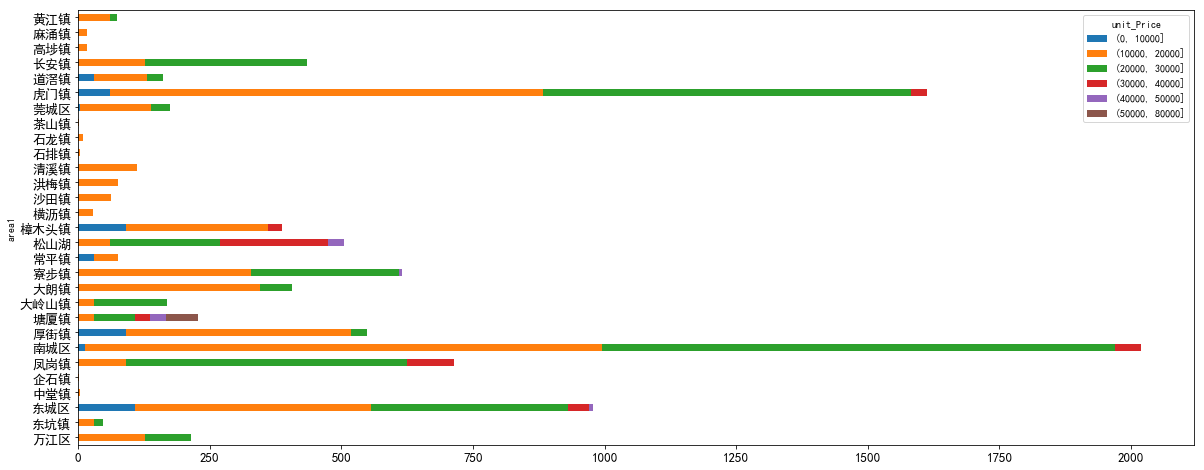

In [6]:

table=data_spf.pivot_table('unit_Price',index='area1',columns=bins_data,aggfunc='count')
table.plot(kind='barh',stacked=True,figsize=(20,8),fontsize=13)
plt.show()

In [7]:
data_spf.unit_Price.max()


54946

In [8]:
data_spf=data_spf.assign(unit_Price=data_spf.unit_Price/10000)
data_spf.unit_Price.max()


5.4946

In [9]:
max_unit=data_spf.unit_Price.max()
min_unit=data_spf.unit_Price.min()

In [10]:
import math
top=math.ceil(max_unit)
low=math.floor(min_unit)
bins=[]
for i in range(low,top+1):
    bins.append(i)
print(bins)
#bins

[0, 1, 2, 3, 4, 5, 6]


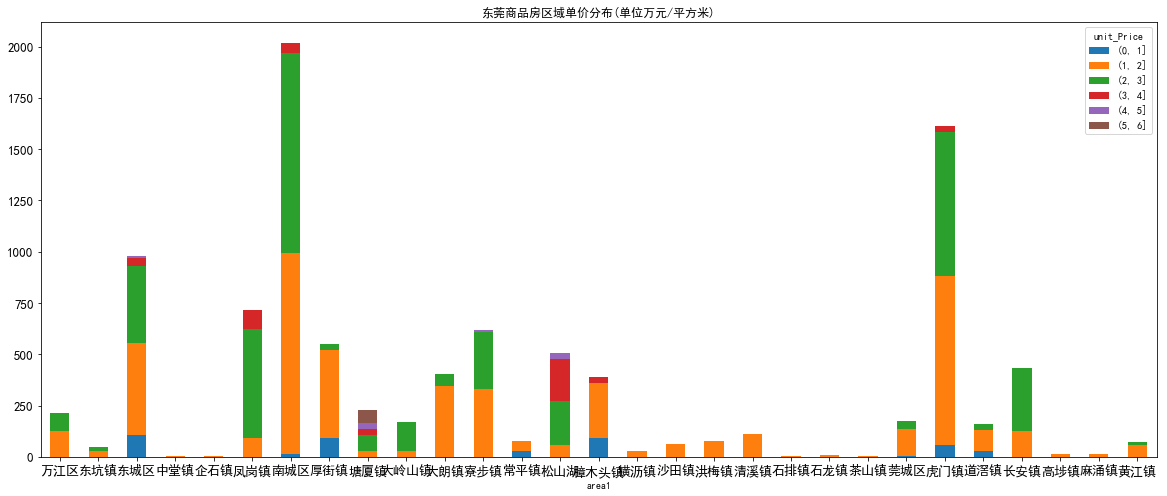

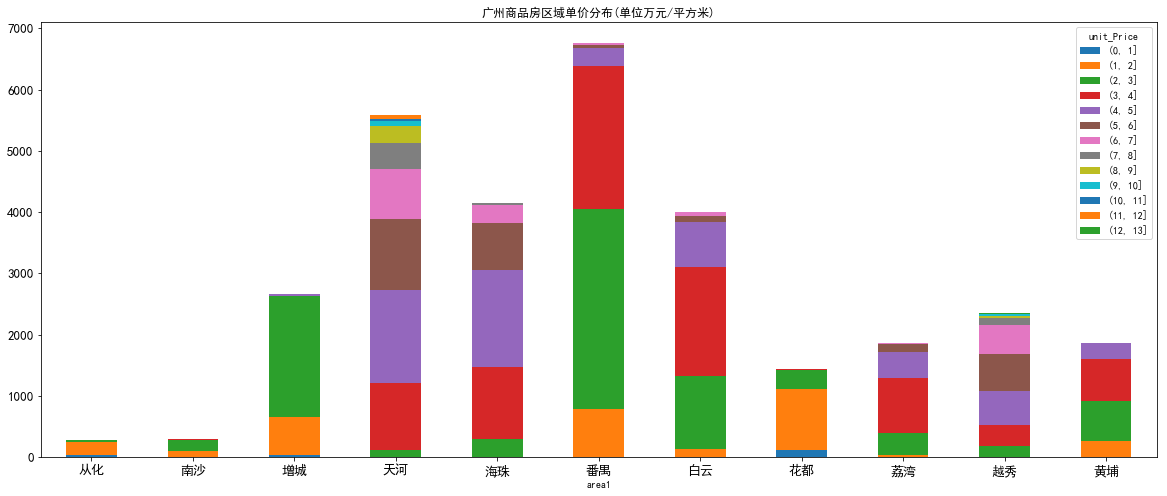

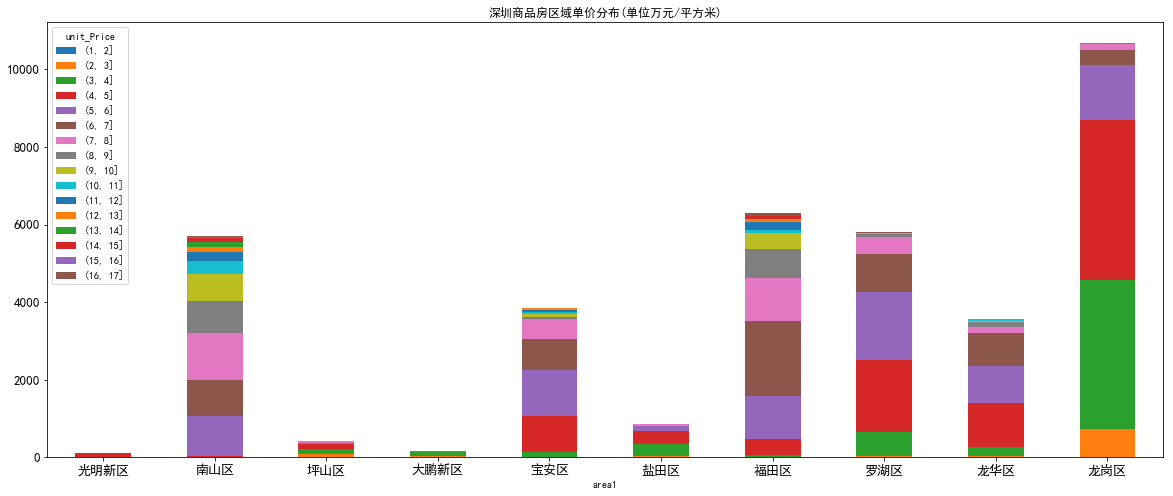

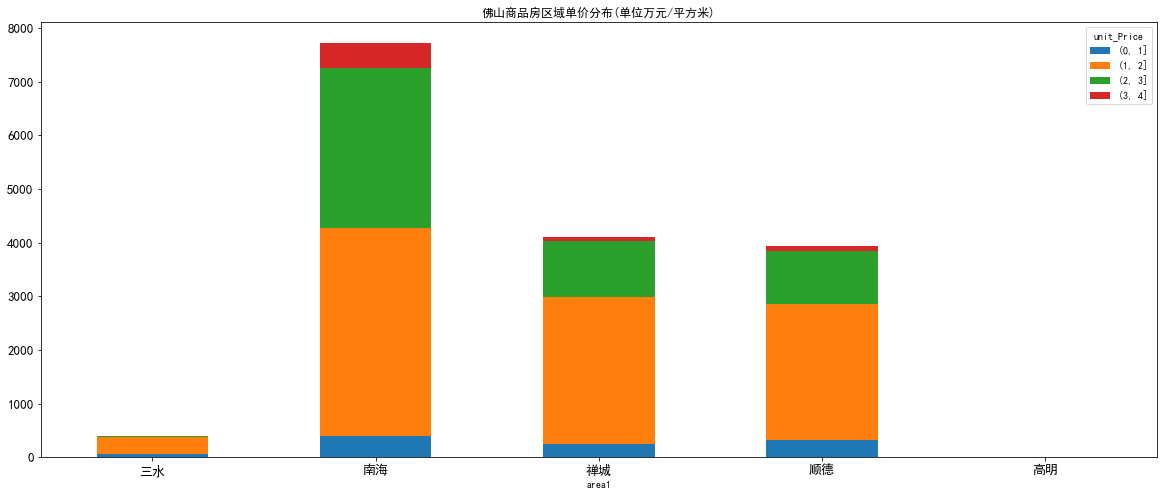

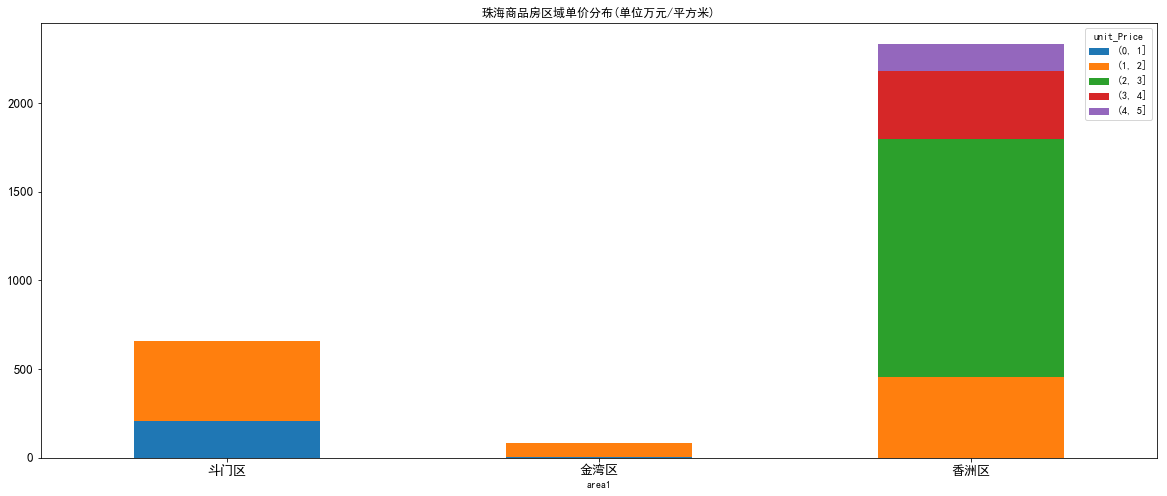

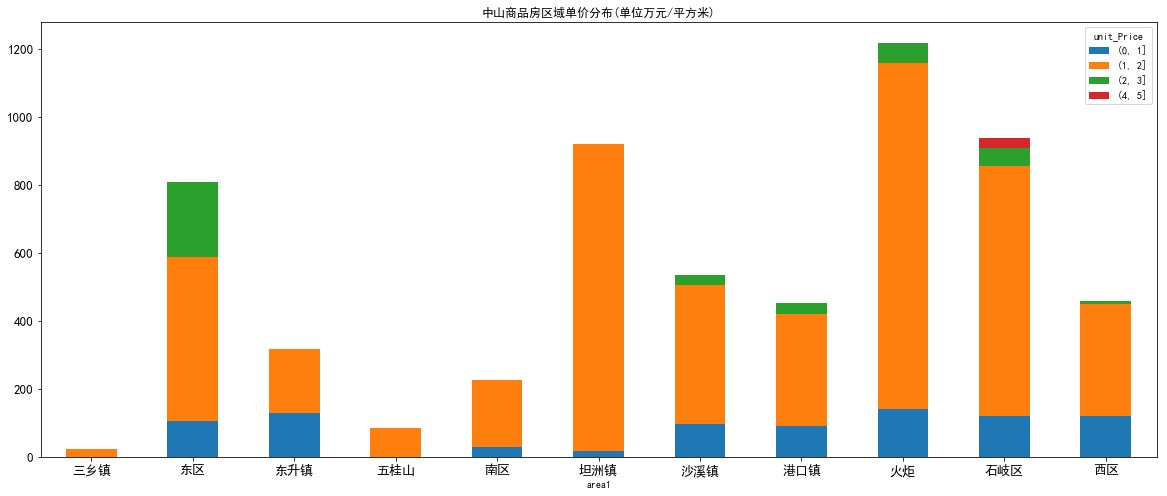

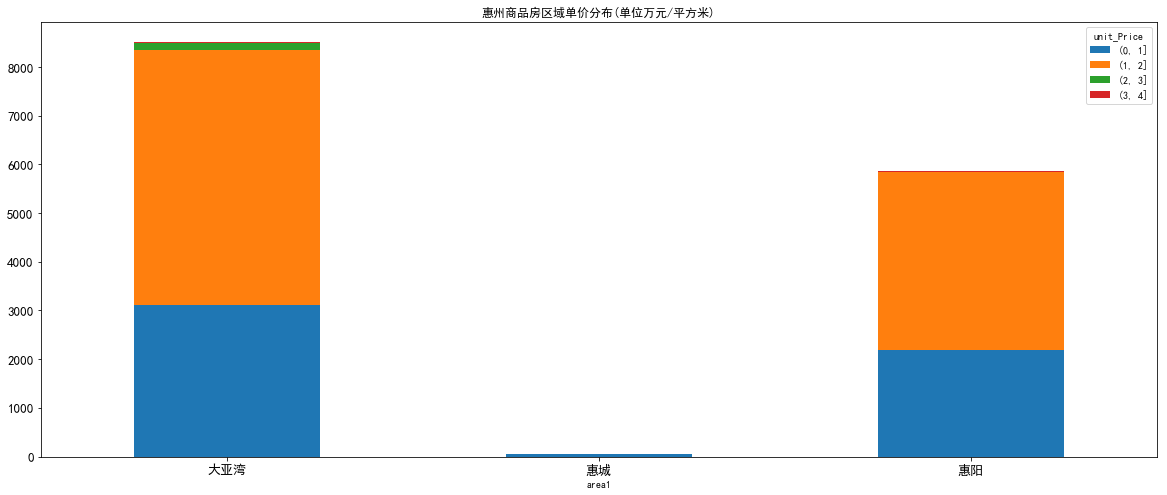

In [11]:
n=1

dict={'dg':'东莞','gz':'广州','sz':'深圳','fs':'佛山','zh':'珠海','zs':'中山','hui':'惠州'}
for i in dict:
    bins=[]
    city=dict[i]
    data=pd.read_csv('./gd{}.csv'.format(n))
    data_spf=data[data['type']=='商品房']
    area1_index=data_spf.groupby(by="area1").count().index.tolist()
    data_spf=data_spf.assign(unit_Price=data_spf.unit_Price/10000)
    max_unit=data_spf.unit_Price.max()
    min_unit=data_spf.unit_Price.min()
    top=math.ceil(max_unit)
    low=math.floor(min_unit)
    for i in range(low,top+1):
        bins.append(i)
    bins_data=pd.cut(data_spf.unit_Price,bins=bins)
    table=data_spf.pivot_table('unit_Price',index='area1',columns=bins_data,aggfunc='count')
    table.plot(kind='bar',stacked=True,figsize=(20,8),fontsize=13,width=0.5,rot=0)
    plt.title('%s商品房区域单价分布(单位万元/平方米)'%city)
    plt.show()
    n+=1


In [14]:
re_list=[]
bins=[]

data=pd.read_csv('./gd1.csv')
data_spf=data[data['type']=='商品房']
area1_index=data_spf.groupby(by="area1").count().index.tolist()
data_spf=data_spf.assign(unit_Price=data_spf.unit_Price/10000)
max_unit=data_spf.unit_Price.max()
min_unit=data_spf.unit_Price.min()
top=math.ceil(max_unit)
low=math.floor(min_unit)
for i in range(low,top+1):
    bins.append(i)
for region in area1_index:
    count_spf=data_spf[data_spf.area1==region]['_id'].count()
    rate=count_spf/len(data_spf)
    if rate>0.01:
        re_list.append(region)
for region in re_list:
    data_region=data_spf[data_spf['area1']==region]
    print(data_region)
#     final_data=pd.concat([data_region],axis=0,ignore_index=True)

# final_data

# table=final_data.pivot_table('unit_Price',index='area1',columns=bins_data,aggfunc='count')  
# final_data.plot(kind='bar',stacked=True,figsize=(20,8),fontsize=13,width=0.5,rot=0)
# plt.show()

    
    
    

      Unnamed: 0                                                _id  address  \
6152        6152  https://dg.lianjia.com/ershoufang/105101464996...   风临美丽湾    
6159        6159  https://dg.lianjia.com/ershoufang/105101924187...   风临美丽湾    
6186        6186  https://dg.lianjia.com/ershoufang/105101461693...   风临美丽湾    
6192        6192  https://dg.lianjia.com/ershoufang/105101345074...   风临美丽湾    
6195        6195  https://dg.lianjia.com/ershoufang/105101192592...   风临美丽湾    
6198        6198  https://dg.lianjia.com/ershoufang/105101737538...   风临美丽湾    
6199        6199  https://dg.lianjia.com/ershoufang/105101622688...   风临美丽湾    
6201        6201  https://dg.lianjia.com/ershoufang/105101597726...   风临美丽湾    
6203        6203  https://dg.lianjia.com/ershoufang/105101718789...   风临美丽湾    
6207        6207  https://dg.lianjia.com/ershoufang/105101540692...   风临美丽湾    
6211        6211  https://dg.lianjia.com/ershoufang/105101492113...   风临美丽湾    
6242        6242  https://dg.lianjia.com